### Notebook to study explicitly the binary/ascii nature of the files from wavedump 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

### binary solution

In [34]:
filepath = '/home/e78368jw/Downloads/tmp_out/testing_arena/Acq_dig2-usb25477_CH0_20240729164957-08.bin'


In [35]:
 with open(filepath, mode = 'rb') as file:
    data = file.read()


#### Looking at the initial component of the binary file

In [36]:
data_head = struct.unpack('iiiii', data[:20])
print(data_head)

(545, 51071950, 0, 12500, 8)


In [37]:
data_body = struct.unpack("i" * ((len(data) - 24) // 4), data[20:-4])
print(data_body)

(0, -1052535423, -1052334096, -1051663008, -1051931443, -1051998552, -1052669641, -1052266988, -1053005185, -1052334096, -1052938076, -1051663008, -1051797225, -1051260355, -1050924810, -1051461681, -1051126137, -1052736750, -1051595899, -1052468314, -1051126137, -1051663008, -1050320830, -1050790593, -1049649742, -1050320830, -1050522157, -1049716851, -1050522157, -1049515524, -1050320830, -1049582633, -1050387939, -1049515524, -1049716851, -1048978653, -1049045762, -1048710218, -1048341119, -1048911544, -1048844435, -1049783960, -1048978653, -1049515524, -1048542446, -1048911544, -1048576000, -1049582633, -1049515524, -1049783960, -1050186613, -1049851068, -1050052395, -1049515524, -1050119504, -1049515524, -1050387939, -1049783960, -1049985286, -1049851068, -1049918177, -1050455048, -1049179980, -1050052395, -1048978653, -1050320830, -1048978653, -1049515524, -1048844435, -1048978653, -1048274010, -1048374673, -1048005575, -1048106238, -1048139792, -1047938466, -1048206901, -1047837

In [38]:
data_end = struct.unpack("i", data[-4:])
print(data_end)

(1104880337,)


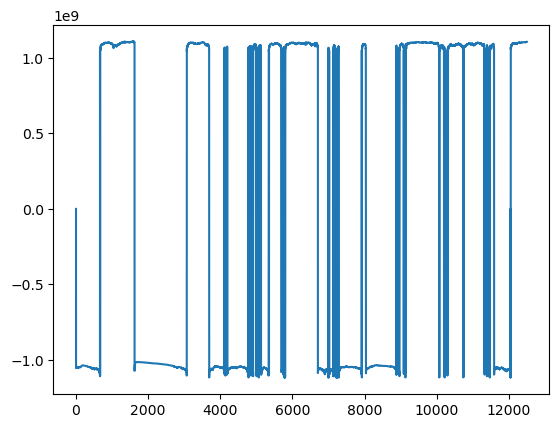

In [41]:
time = np.linspace(0,len(data_body), num = len(data_body))
plt.plot(time, data_body)
plt.show()

### read txt files

In [2]:
filepath = '/home/e78368jw/Downloads/tmp_out/testing_arena/test/Acq_dig2-usb25477_CH0_20240729174035-12.txt'

In [3]:
 with open(filepath, mode = 'rb') as file:
    data_txt = file.read()

In [5]:
print(data_txt[:66])
print(data_txt[63:128].decode('ascii').split('\t'))
#for i in range(len(data_txt[]))
#print(data_txt[64:128].split('\t'))

data_txt_full = data_txt[63:(12500*6)+63]
data_txt_full = data_txt_full[:-1]
data_txt_full = np.array(data_txt_full.decode('ascii').split('\t'), dtype = int)


print(int(data_txt_full[0]))
#data_txt_full = [int(i) for i in data_txt_full]

time = np.linspace(0,len(data_txt_full), num = len(data_txt_full))


b'Event n. 0\nTimeStamp: 82118\nSamples: 12500\n1 Sample = 0.008 us\n324'
['32439', '32448', '32440', '32455', '32453', '32446', '32456', '32450', '32465', '32461', '32474']
32439


In [5]:
#(len(data_txt_full) - 1) / 12500
print(data_txt_full[:10])
print(time[:10])

[32439 32448 32440 32455 32453 32446 32456 32450 32465 32461]
[0.         1.00008001 2.00016001 3.00024002 4.00032003 5.00040003
 6.00048004 7.00056004 8.00064005 9.00072006]


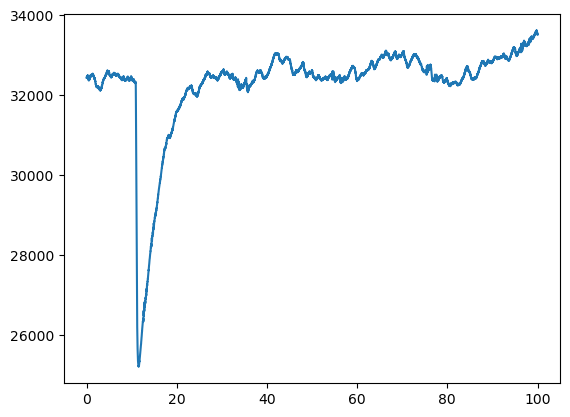

In [6]:
plt.plot(time*0.008, data_txt_full)
plt.show()

In [66]:
def ascii_to_df(data):
    '''
    should already be read in as shown above
    '''

    # split them by 'Event', first element is empty so ignored
    data_txt_full = (data.decode('ascii').split('Event n.'))[1:]


    # remove majority of nonsense values
    stripped_data = [item.split(' Sample')[1].split('\n', 1)[1] for item in data_txt_full]


    
    return [np.array(item.split('	')[:-1], dtype = int) for item in stripped_data]
    

In [63]:
test = data_txt.decode('ascii').split('Event n.')
# remove first element
test_trim = test[1:]


#print(test_trim[0].split(' Sample')[1].split('\n', 1)[1])


print(test_trim[0])
print(test_trim[1])
#print(test_trim[2])
#print(test_trim[3])
stripped_data = [item.split(' Sample')[1].split('\n', 1)[1] for item in test_trim]
print("======== TRIMMED DATA =======")
print(stripped_data[0])
print(stripped_data[1])
#print([x.split('\n')[0:10] for x in test])

# remove last element (\n)
final_data = [np.array(item.split('	')[:-1], dtype = int) for item in stripped_data]

print(final_data[0])
print(final_data[1])

 0
TimeStamp: 82118
Samples: 12500
1 Sample = 0.008 us
32439	32448	32440	32455	32453	32446	32456	32450	32465	32461	32474	32462	32471	32456	32464	32461	32476	32469	32470	32484	32479	32485	32480	32490	32480	32486	32486	32487	32493	32484	32494	32486	32488	32475	32488	32464	32475	32454	32460	32448	32444	32440	32428	32428	32412	32420	32408	32416	32404	32412	32405	32409	32412	32398	32404	32382	32393	32378	32388	32373	32387	32386	32392	32393	32388	32380	32371	32379	32375	32385	32375	32397	32390	32392	32396	32394	32396	32392	32407	32399	32410	32405	32412	32404	32408	32406	32412	32420	32416	32427	32419	32436	32434	32446	32438	32446	32452	32448	32453	32452	32454	32453	32484	32474	32488	32485	32489	32477	32483	32482	32480	32485	32493	32506	32496	32510	32500	32504	32488	32491	32488	32480	32488	32486	32500	32484	32502	32490	32497	32474	32484	32473	32479	32481	32480	32489	32476	32490	32477	32490	32483	32490	32488	32491	32494	32488	32500	32490	32508	32489	32512	32492	32515	32503	32512	32515	32517	325

In [76]:
func_data = ascii_to_df(data_txt)
print(len(func_data[0]))

12500


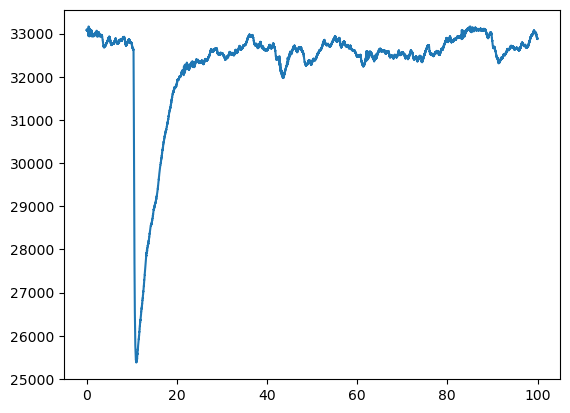

In [82]:
var = 3

time = np.linspace(0,len(func_data[var]), num = len(func_data[var]))
plt.plot(time*0.008, func_data[var])
plt.show()

In [9]:
print(data_txt[:63].decode('ascii'))

Event n. 0
TimeStamp: 82118
Samples: 12500
1 Sample = 0.008 us

